# Algorithme de Kruskal

**Idée** : On part du graphe $T=(V, \emptyset)$ et on ajoute tour à tour une nouvelle arête de plus petit poids qui ne crée pas de cycles (i.e. qui connecte deux composantes connexes différentes).

**Invariant** : À l'étape $i$, le graphe $T$ est acyclique avec $i$ arêtes de poids minimal

- [Algorithme de Kruskal](https://fr.wikipedia.org/wiki/Algorithme_de_Kruskal)
- [Union Find](https://fr.wikipedia.org/wiki/Union-find)

Dans ce qui suit nous exécutons à la main, l'algorithme de Kruskal

In [1]:
from graph import Graph, examples
import networkx
import matplotlib
import matplotlib.pyplot as plt

In [2]:
## On part d'un graphe valué et on fixe un dessin
G = examples.cours_1_reseau()
GNX = G.networkx()
layout = networkx.planar_layout(GNX)
edges_weight = {(u, v) : w for u, v, w in G.edges()}

In [3]:
## On visulise la progression de l'algorithme en affectant à chaque arête un état représenté par une couleur
from enum import Enum, unique
@unique
class Status(Enum):
    AFAIRE = 0
    GARDEE = 1
    SUPRIMEE = 2
    ENCOURS = 3
colors_code = { 
    Status.AFAIRE : 'black',
    Status.GARDEE : 'green',
    Status.SUPRIMEE : 'lightgray',
    Status.ENCOURS : 'red'
}

In [4]:
def show_kruskal(status):
    plt.figure()
    colors = [colors_code[status[u,v]] for (u, v) in GNX.edges()]
    networkx.draw(GNX, layout, edge_color = colors, width=3, linewidths=1,
                  node_size=500, node_color = 'lightgray', alpha=0.9,
                  labels = {node : node for node in G.vertices()})
    networkx.draw_networkx_edge_labels(GNX, layout, edge_labels= edges_weight, font_color='black')
    plt.axis('off')
    plt.show()

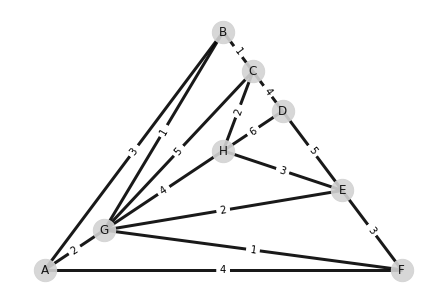

In [5]:
# Au début toutes les arêtes sont marquée "à faire"
edges_status = {(u, v) : Status.AFAIRE for u, v, _ in G.edges()}
show_kruskal(edges_status)

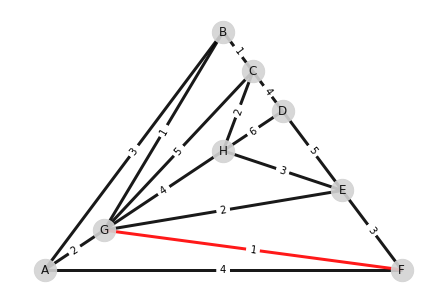

In [6]:
# On choisit l'une des arêtes de poids minimum
edges_status["F", "G"] = Status.ENCOURS
show_kruskal(edges_status)

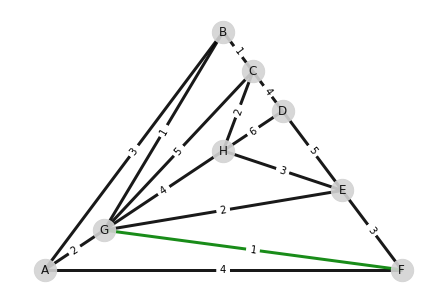

In [7]:
# Elle ne crée pas de cycle. On la garde
edges_status["F", "G"] = Status.GARDEE
show_kruskal(edges_status)

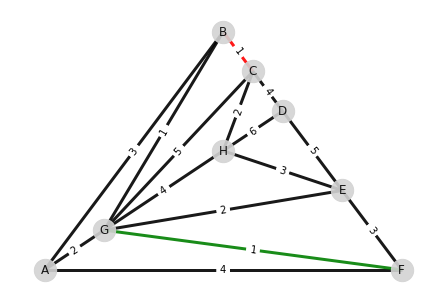

In [8]:
# On choisit l'une des arêtes de poids minimum
edges_status["B", "C"] = Status.ENCOURS
show_kruskal(edges_status)

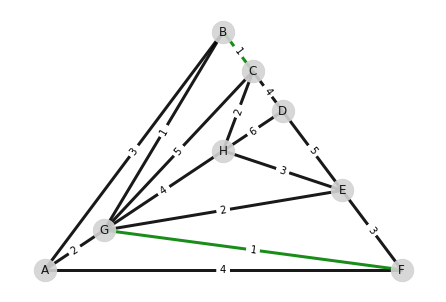

In [9]:
# Elle ne crée pas de cycle. On la garde
edges_status["B", "C"] = Status.GARDEE
show_kruskal(edges_status)

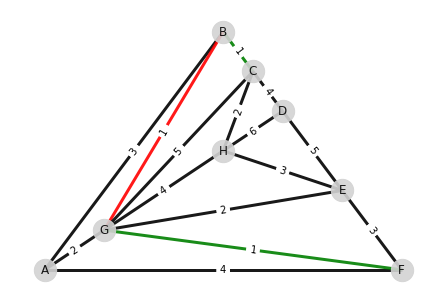

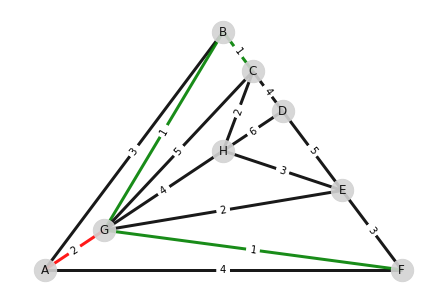

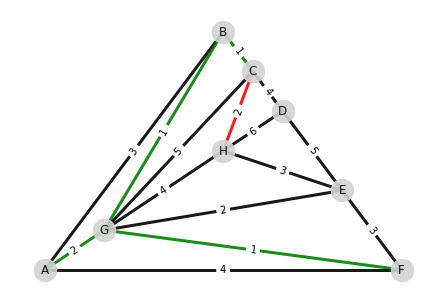

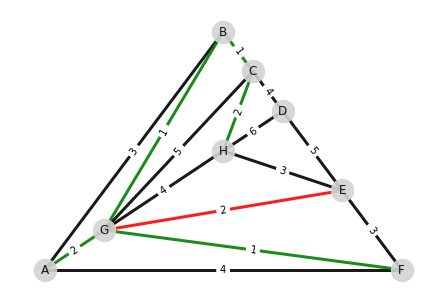

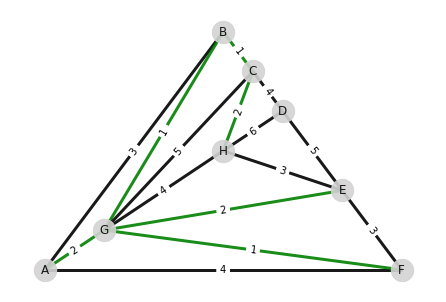

In [10]:
# L'algorithme se continue ainsi
edges_status["B", "G"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["B", "G"] = Status.GARDEE
edges_status["A", "G"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["A", "G"] = Status.GARDEE
edges_status["C", "H"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["C", "H"] = Status.GARDEE
edges_status["E", "G"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["E", "G"] = Status.GARDEE
show_kruskal(edges_status)

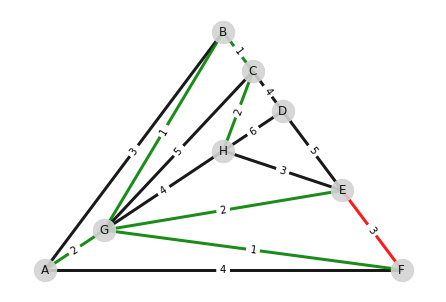

In [11]:
# On Passe maintenant aux arêtes de poids 3
edges_status["E", "F"] = Status.ENCOURS
show_kruskal(edges_status)

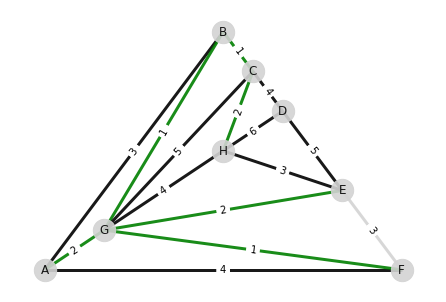

In [12]:
# L'arête E - F crée un Cycle, on la supprime
edges_status["E", "F"] = Status.SUPRIMEE
show_kruskal(edges_status)

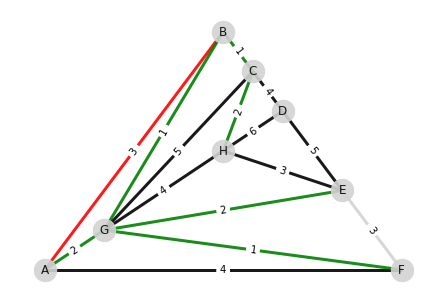

In [13]:
# On Passe maintenant a A - B
edges_status["A", "B"] = Status.ENCOURS
show_kruskal(edges_status)

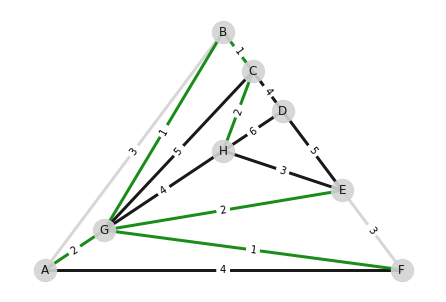

In [14]:
# L'arête A - B crée un Cycle, on la supprime
edges_status["A", "B"] = Status.SUPRIMEE
show_kruskal(edges_status)

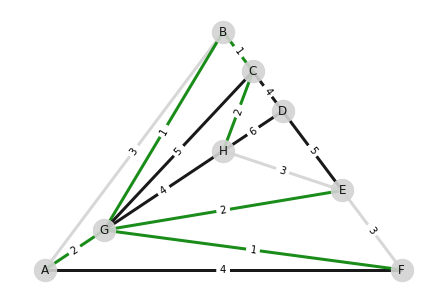

In [15]:
# Idem pour E - H
edges_status["E", "H"] = Status.SUPRIMEE
show_kruskal(edges_status)

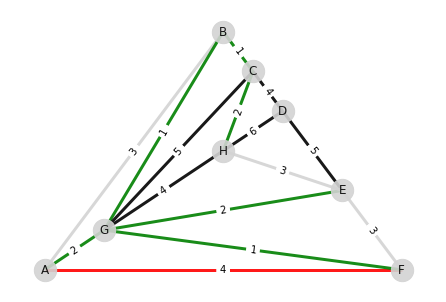

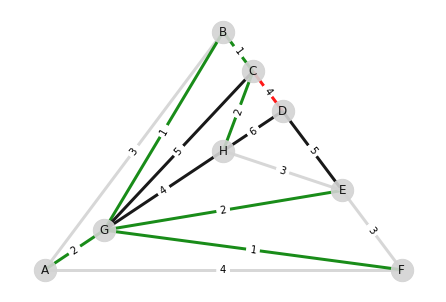

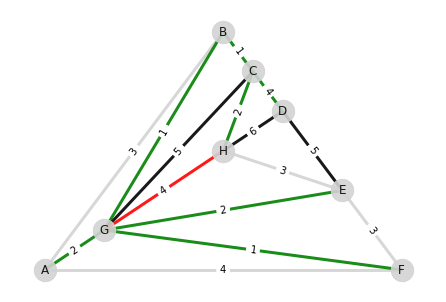

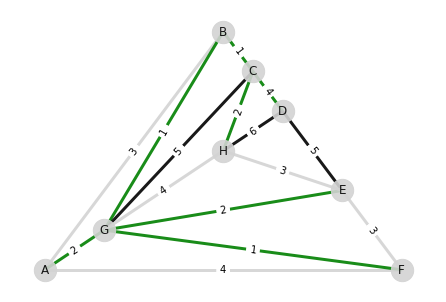

In [16]:
# L'algorithme se poursuit
edges_status["A", "F"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["A", "F"] = Status.SUPRIMEE
edges_status["C", "D"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["C", "D"] = Status.GARDEE
edges_status["G", "H"] = Status.ENCOURS
show_kruskal(edges_status)
edges_status["G", "H"] = Status.SUPRIMEE
show_kruskal(edges_status)

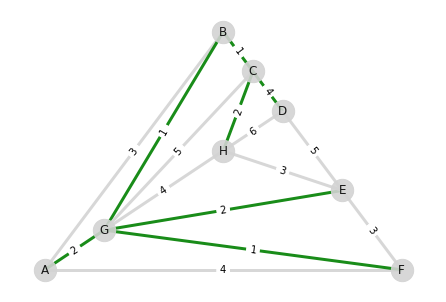

In [17]:
# On pourrait continuer jusqu'à ce que l'on ai vu toutes les arêtes...
# On remarque que l'on a choisi 7 arêtes dans un graphe à 8 sommets. On peut donc s'arrêter dès maintenant.
edges_status["C", "G"] = Status.SUPRIMEE
edges_status["D", "E"] = Status.SUPRIMEE
edges_status["D", "H"] = Status.SUPRIMEE
show_kruskal(edges_status)

On a calculé un arbre couvrant de poids 13 du graphe.

L'invariant de l'algorithme est le suivant:

À chaque étape, le graphe des arêtes choisies est un graphe partiel acyclique de $G$ de poids minimum 

**Exercice 2.** Appliquer à la main l'algorithme de Kruskal au deux graphes suivants. On donnera un arbre couvrant de **poids minimal** et un arbre couvrant de **poids maximal**. Pour ce dernier on applique le même algorithme mais en choissant un arête de plus fort poids.

<img src="media/arb-001.jpg" width="600" height="600" />

Donner le poids de l'arbre couvrant obtenu.

34

<img src="media/arb-002.jpg" width="600" height="600" />

Donner le poids de l'arbre couvrant obtenu.

YOUR ANSWER HERE

Expliquer pourquoi l'invariant est conservé.

* Invariant : Le graphe $T$ est un graphe partiel acyclique de $G = (V, E)$ de poids minimum.
* Initialisation : Il n'y a pas d'arête donc $T = (V, \emptyset)$ respecte l'invariant.
* Récurrence : A la i-ème étape j'ajoute une arête entre deux sommets $(s, t)$ au graphe $T$ pour obtenir le graphe $T'$. Par construction, l'ajout de cette arête ne crée pas de cycle. De plus, c'est celle de poids minimal parmi celles que je n'ai pas encore ajoutées au graphe. Par hypothèse de récurrence, le graphe $T$ respecte l'invariant. Supposons que $T'$ ne respecte pas l'invariant. Il est impossible que $T'$ soit cyclique par construction. Si $T'$ n'est pas le graphe partiel des poids minimaux noté $T''$, alors la somme des poids de $T'$ doit être supérieure strictement à la somme des poids de $T$ à laquelle on ajoute le poids de l'arête de poids minimal restant $(s, t)$. Or, comme on ajoute justement cette arête on obtient forcément une somme des poids identiques pour $T'$ et $T''$. Donc $T' = T''$ respecte l'invariant.

## Stucture de donnée 'Union-Find'

Dans l'algorithme de Kruskal, on a besoin de savoir en permanence si les deux extrémités de l'arête considérée sont  dans la même composante connexe. Il serait très inefficace de refaire à chaque fois un parcours. On a donc besoin d'une structure de donnée qui permet de maintenir les composantes connexes du graphe partiel au cours de l'algorithme. C'est la structure [Union Find](https://fr.wikipedia.org/wiki/Union-find).

C'est une structure de données qui représente une partition d'un ensemble fini. On rappelle qu'une partition d'un ensemble $E$ est un ensemble de parties non vides de $E$ deux à deux disjointes et dont l'union est $E$. Dans notre application la partition est l'ensemble des composantes connexes de $V$.

L'idée d'union find est de choisir dans chaque composante connexe un sommet dit "canonique". On va ensuite implémenter les deux méthodes suivantes:
- `find(v)` : quel est le sommet canonique de la composante connexe d'un sommet $v$ donné.
- `union(u, v)` : mettre à jour la structure de donnée pour réunir les composantes des sommets canoniques $u$ et $v$.  

Pour ceci, on va stocker une forêt où chaque arbre est un chaînage d'une composante connexe qui pointe vers le sommet canonique.

Dans une telle forêt, le représentant de chaque classe est la racine de l'arbre correspondant. Find se contente de suivre les liens vers les nœuds pères jusqu'à atteindre la racine. Union réunit deux arbres en attachant la racine de l'un à la racine de l'autre.

Vous pouvez trouver des détail sur [Union-Find](https://fr.wikipedia.org/wiki/Union-find).

Il existe une [applet](http://www.irisa.fr/prive/fschwarz/mit1_algo2_2013/union_find/) de simulation.

#### À Faire

Écrire une classe `UnionFind` implémentant les trois méthodes suivantes:
- `UnionFind(S)` : constructeur (`__init__` en Python) qui initialize l'ensemble avec toutes les classes singletons
- `UF.find(i)` : trouve l'élément canonique de la classe de `i`
- `UF.union(i, j)` : réuni les classes associées à `i` et `j`

On utilisera les deux optimisations:
- heuristique du rang pour diminuer la hauteur de l'arbre en cas d'`Union`.
- compression des chemins dans le cas d'un find : on reparcourt le chemin en associant directement le noeud canonique aux éĺéments du chemin. On écrira une version **itérative**.

In [18]:
# Version naïve
class UnionFind:
    def __init__(self, V):
        self.father = dict()
        for v in V:
            self.father[v] = v
        
    def find(self, u):
        # Recherche du canonique par saut
        v = self.father[u]
        while v != self.father[v]:
            v = self.father[v]
        return v
        
    def union(self, u, v):
        self.father[self.find(v)] = self.find(u)

Tester `UnionFind`

In [19]:
G = Graph(vertices=['A', 'B', 'C', 'D', 'E', 'F'], edges=[
    ('A', 'B', 1), ('A', 'C', 1), ('B', 'C', 1), ('A', 'D', 1), ('D', 'E', 1)
])
G.show()

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='400px', width='400…

In [20]:
UF = UnionFind(G.vertices())
print(UF.father)
UF.union('A', 'B')
print(UF.father)
UF.union('A', 'C')
print(UF.father)
UF.union('D', 'E')
print(UF.father)
UF.union('A', 'D')
print(UF.father)
# On découvre un cycle
assert UF.find('B') == UF.find('C')
# Les canoniques de D et E sont identiques
assert UF.find('D') == UF.find('E')

{'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D', 'E': 'E', 'F': 'F'}
{'A': 'A', 'B': 'A', 'C': 'C', 'D': 'D', 'E': 'E', 'F': 'F'}
{'A': 'A', 'B': 'A', 'C': 'A', 'D': 'D', 'E': 'E', 'F': 'F'}
{'A': 'A', 'B': 'A', 'C': 'A', 'D': 'D', 'E': 'D', 'F': 'F'}
{'A': 'A', 'B': 'A', 'C': 'A', 'D': 'A', 'E': 'D', 'F': 'F'}


In [21]:
# Version optimisée
class UnionFind:
    def __init__(self, V):
        self.father = dict()
        self.rank = dict()
        for v in V:
            self.father[v] = v
            self.rank[v] = 0
        
    def find(self, u):
        # Recherche du canonique par saut
        v = self.father[u]
        while v != self.father[v]:
            v = self.father[v]
        # Compression
        if v != self.father[u]:
            self.father[u] = v
        return v
        
    def union(self, u, v):
        # Heuristique de rang
        rank_u = self.rank[u]
        rank_v = self.rank[v]
        canon_u = self.find(u)
        canon_v = self.find(v)
        if rank_u == rank_v:
            self.father[canon_v] = canon_u
            self.rank[canon_u] += 1
        elif rank_u > rank_v:
            self.father[canon_v] = canon_u
        else:
            self.father[canon_u] = canon_v

In [22]:
UF = UnionFind(G.vertices())
print(UF.father)
UF.union('A', 'B')
print(UF.father)
UF.union('A', 'C')
print(UF.father)
UF.union('D', 'E')
print(UF.father)
UF.union('A', 'D')
print(UF.father)
# On découvre un cycle
assert UF.find('B') == UF.find('C')
# Les canoniques de D et E sont identiques
assert UF.find('D') == UF.find('E')
print(UF.father)
print(UF.rank)

{'A': 'A', 'B': 'B', 'C': 'C', 'D': 'D', 'E': 'E', 'F': 'F'}
{'A': 'A', 'B': 'A', 'C': 'C', 'D': 'D', 'E': 'E', 'F': 'F'}
{'A': 'A', 'B': 'A', 'C': 'A', 'D': 'D', 'E': 'E', 'F': 'F'}
{'A': 'A', 'B': 'A', 'C': 'A', 'D': 'D', 'E': 'D', 'F': 'F'}
{'A': 'A', 'B': 'A', 'C': 'A', 'D': 'A', 'E': 'D', 'F': 'F'}
{'A': 'A', 'B': 'A', 'C': 'A', 'D': 'A', 'E': 'A', 'F': 'F'}
{'A': 2, 'B': 0, 'C': 0, 'D': 1, 'E': 0, 'F': 0}


La classe UnionFind permet d'avoir un autre algorithme pour calculer les composantes connexes : 

- on part de la partition triviale (tous les sommets sont seuls dans leur classes)
- on appelle `union(i,j)` pour toutes les arêtes $i - j$.

À la fin, on obtient la partition des sommets en composantes connexes.

Ecrire une méthode `connected_componentsUF()` et vérifier sur tous les graphes d'exemple qu'elle renvoie le même résultat que `connected_components()`

In [23]:
def connected_componentsUF(G):
    # Regroupement des sommets avec UnionFind
    UF = UnionFind(G.vertices())
    for (u, v, _) in G.edges():
        UF.union(u, v)
    # Récupération des composantes connexes
    components = dict()
    for v in G.vertices():
        canonical = UF.find(v)
        if not components.__contains__(canonical):
            components[canonical] = {v}
        else:
            components[canonical].add(v)
    return list(components.values())

In [24]:
G = Graph(vertices=['A', 'B', 'C', 'D', 'E', 'F'], edges=[
    ('A', 'B', 1), ('A', 'C', 1), ('B', 'C', 1), ('A', 'D', 1), ('D', 'E', 1)
])
connected_componentsUF(G)

[{'A', 'B', 'C', 'D', 'E'}, {'F'}]

In [25]:
graphs = [examples.cours_1_reseau(), examples.undirected(), examples.disconnected()]
for G in graphs:
    CCG1 = G.connected_components()
    CCG2 = G.connected_componentsUF()
    assert len(CCG1) == len(CCG2)
    for i in range(len(CCG1)):
        assert sorted(list(CCG1[i])) == sorted(list(CCG2[i]))

En utilisant `UnionFind`, écrire l'algorithme de Kruskal pour calculer l'arbre couvrant de poids minimum d'un graphe.

In [26]:
def kruskal(G):
    # Création de l'arbre recouvrant des poids minimum
    T = Graph(vertices=G.vertices())
    # Structure UnionFind pour détecter les composantes connexes
    UF = UnionFind(G.vertices())
    # Tri dans l'ordre croissant des poids des arêtes
    edges = list(G.edges())
    edges.sort(key=lambda x: x[2])
    for (u, v, c) in edges:
        # On ne relie pas deux sommets dans le même composante connexe
        # Sinon cela créerait un cycle
        if UF.find(u) != UF.find(v):
            UF.union(u, v)
            T.set_edge_capacity(u, v, c)
    return T

Tester votre fonction sur les graphes du fichier `graph_exemples.py`

In [27]:
G = Graph(vertices=['A', 'B', 'C', 'D', 'E', 'F'], edges=[
    ('A', 'B', 1), ('A', 'C', 1), ('B', 'C', 1), ('A', 'D', 1), ('D', 'E', 1)
])
kruskal(G).show()

Figure(fig_margin={'top': 60, 'bottom': 60, 'left': 60, 'right': 60}, layout=Layout(height='400px', width='400…

In [28]:
graphs = [examples.G1(), examples.G2(), examples.G3(), examples.G4(), examples.Tr1(), examples.G10(), examples.G20(), examples.Gr100()]
for G in graphs:
    T = G.kruskal()
    if T.is_connected():
        assert T.is_tree()

## Application : Construction d'un labyrinthe

En partant du graphe grille $m*n$, construire un labyrinthe parfait à l'aide d'un arbre couvrant.
On pourra faire un affichage ASCII comme ci-dessous.

    +---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+
    |   |   |           |   |       |                   |       |   |               |
    +   +   +---+   +   +   +   +   +---+   +---+   +---+---+   +   +   +   +---+   +
    |       |   |   |   |       |   |       |               |       |   |   |   |   |
    +   +---+   +   +---+   +---+   +---+---+---+   +---+   +   +   +---+   +   +   +
    |   |           |           |   |       |       |   |   |   |           |       |
    +   +   +---+   +   +---+   +---+   +---+---+   +   +---+---+---+   +---+   +---+
    |           |   |       |   |                   |   |   |   |   |   |           |
    +   +   +---+   +---+   +---+   +   +---+---+---+   +   +   +   +---+   +---+   +
    |   |       |           |       |           |               |   |   |   |   |   |
    +---+---+---+---+---+   +---+   +---+---+---+   +---+---+   +   +   +   +   +   +
    |                           |                           |   |               |   |
    +---+   +---+---+   +   +---+---+   +---+   +---+---+---+   +   +---+---+---+---+
    |       |       |   |   |   |           |           |       |           |       |
    +---+---+   +---+   +   +   +   +---+---+   +---+---+---+   +   +---+   +---+   +
    |           |       |   |   |   |           |                       |       |   |
    +   +---+   +---+   +---+   +---+---+---+---+---+   +---+---+   +---+---+   +   +
    |   |   |       |   |   |   |   |   |               |   |       |   |           |
    +   +   +   +---+   +   +   +   +   +---+---+   +---+   +---+---+   +   +---+   +
    |   |               |           |       |   |                       |       |   |
    +   +---+---+   +   +---+   +---+   +---+   +   +---+---+   +---+---+---+   +---+
    |   |           |   |           |                   |           |       |   |   |
    +---+---+   +---+   +---+   +---+---+---+---+---+---+   +---+   +   +---+---+   +
    |       |   |                   |   |   |   |           |               |   |   |
    +---+   +   +---+   +   +   +---+   +   +   +   +---+   +---+   +   +---+   +   +
    |           |       |   |       |               |   |   |   |   |               |
    +---+   +   +   +---+   +   +   +   +---+---+---+   +   +   +---+---+---+---+---+
    |   |   |   |   |       |   |               |   |   |       |   |       |       |
    +   +   +---+   +---+   +---+   +   +---+---+   +   +   +   +   +---+   +   +---+
    |           |       |   |       |       |               |       |   |   |   |   |
    +---+   +---+---+---+---+---+   +---+   +   +   +---+   +---+   +   +   +   +   +
    |       |   |           |           |   |   |       |       |       |           |
    +   +---+   +---+   +---+---+---+---+---+---+   +---+---+   +---+   +   +---+---+
    |   |       |               |                   |           |   |       |   |   |
    +---+---+   +   +---+   +   +   +---+   +   +---+   +---+   +   +---+   +   +   +
    |           |   |   |   |           |   |   |           |       |       |       |
    +---+---+   +   +   +   +---+   +   +---+   +---+---+---+   +---+   +---+   +   +
    |   |           |       |   |   |       |           |           |           |   |
    +   +---+   +---+---+   +   +---+   +---+   +---+---+   +   +   +   +---+   +---+
    |               |               |       |       |       |   |   |   |           |
    +---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+

In [29]:
import random

def build_grid(n, m):
    """
    Construction du graphe représentant la grille
    :param n: Nombre de lignes
    :param m: Nombre de colonnes
    :return: Graphe
    """
    assert n > 1 and m > 1
    
    rand = lambda: random.randint(1, n * m)
    # Numéro de sommet par rapport aux indices de la grille
    node = lambda i, j: j + (m * i)
    
    # Construction des arêtes de la grille
    edges = []
    # Toutes les arêtes sauf bord droit et bas du rectangle
    for i in range(n-1):
        for j in range(m-1):
            k = node(i, j)
            edges.append((k, k + 1, rand()))
            edges.append((k, k + m, rand()))
    # Bord droit
    for i in range(n - 1):
        k = node(i, m - 1)
        edges.append((k, k + m, rand()))
    # Bord bas
    for j in range(m - 1):
        k = node(n - 1, j)
        edges.append((k, k + 1, rand()))
        
    return Graph(vertices=list(range(n * m)), edges=edges)

In [30]:
def print_laby(G, n, m):
    """
    Affichage du labyrinthe
    :param G: Graphe à afficher représentant une grille
    :param n: Nombre de lignes
    :param m: Nombre de colonnes
    """
    for k in range(n * m):
        print('+', end='')
        if (k + 1) % m == 0:
            print('\n', end='')
            for l in range(k + 1 - m, k + 1):
                if G.is_edge(l, l + m):
                    print('|' + ' ' * 3, end='')
                else:
                    print(' ' * 4, end='')
            print('\n', end='')
        else:
            if G.is_edge(k, k+1):
                print('-' * 3, end='')
            else:
                print(' ' * 3, end='')

In [31]:
G = build_grid(3,3)
print_laby(G, 3, 3)
G.remove_edge(0, 1)
print_laby(G, 3, 3)
G.remove_edge(1, 4)
print_laby(G, 3, 3)

+---+---+
|   |   |   
+---+---+
|   |   |   
+---+---+
            
+   +---+
|   |   |   
+---+---+
|   |   |   
+---+---+
            
+   +---+
|       |   
+---+---+
|   |   |   
+---+---+
            


In [32]:
n = m = 21
G = build_grid(n, m)
T = G.kruskal()
print_laby(T, n, m)

+---+   +---+   +---+---+---+---+   +   +---+---+---+---+   +   +   +---+   +---+
|           |       |               |   |   |   |           |   |   |           |   
+---+---+---+   +---+---+---+   +   +   +   +   +---+   +   +   +---+   +---+---+
    |       |           |   |   |   |           |   |   |   |       |       |       
+   +---+   +---+---+---+   +   +   +---+   +---+   +   +---+   +   +---+   +   +
|           |       |           |   |   |   |           |   |   |       |   |   |   
+---+   +   +   +---+---+   +   +   +   +   +---+---+   +   +   +---+   +---+   +
    |   |   |   |           |   |   |   |   |       |   |           |       |   |   
+---+   +---+   +   +---+---+---+---+   +---+   +   +   +---+   +---+---+   +---+
    |       |                   |           |   |           |           |       |   
+---+   +   +---+   +---+   +---+---+---+   +   +---+   +---+---+   +---+   +---+
    |   |   |   |   |   |               |   |       |   |       |       |   |      

Je n'ai pas fait les bords fermés sinon on ne peut pas s'échapper...